In [2]:
# library
import cmath
import math
import scipy
import numpy as np

In [3]:
y_mat = [[0.2 - 1j*19.84, -0.10 + 1j*10.00, -0.10 + 1j*10.00],
        [-0.1 + 1j*10.10, 0.15 - 1j*14.74, -0.05 + 1j*5],
        [-0.1 + 1j*10, -0.05 + 1j*5, 0.15 - 1j*13.76 ]]

In [4]:
g = np.zeros((3, 3))
b = np.zeros((3, 3))

In [5]:
g = np.array([[y_mat[i][j].real for i in range(3)] for j in range(3)])
b = np.array([[y_mat[i][j].imag for i in range(3)] for j in range(3)])

In [6]:
jacob = np.zeros((6, 6))

In [7]:
jacob[0][0] = jacob[1][1] = 1
jacob[3][2] = 2
print(g.shape, b.shape, jacob.shape)
print(jacob)

(3, 3) (3, 3) (6, 6)
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]


In [8]:
x1 = np.array([1.1, 0, 1.0, 0, 1.0, 0])
ys = np.array([0, 0, 2.5, 1.02, -4, -2])
e = np.array([1.1, 1, 1])
f = np.array([0, 0, 0])
x = [e[i//2] if i % 2 else f[i//2] for i in range(6)]
print(e, f)
print(g)
print(b)

[1.1 1.  1. ] [0 0 0]
[[ 0.2  -0.1  -0.1 ]
 [-0.1   0.15 -0.05]
 [-0.1  -0.05  0.15]]
[[-19.84  10.1   10.  ]
 [ 10.   -14.74   5.  ]
 [ 10.     5.   -13.76]]


In [10]:
jacob[2][0] = g[1][0]*e[1] + b[1][0]*f[1]
jacob[2][1] = -b[1][0]*e[1] + g[1][0]*f[1]
jacob[2][2] = g[1][0]*e[0] - b[1][0]*f[0] + g[1][1]*e[1] - b[1][1]*f[1] + g[1][2]*e[2] - b[1][2]*f[2] + g[1][1]*e[1] + b[1][1]*f[1]
jacob[2][3] = b[1][0]*e[1] + g[1][0]*f[0] + b[1][1]*e[1] + b[1][2]*e[2] + g[1][2]*f[2] - b[1][1]*e[1] + g[1][1]*f[1]
jacob[2][4] = g[1][2]*e[1] + b[1][2]*f[1]
jacob[2][5] = -b[1][2]*e[1] + g[1][2]*f[1]

jacob[4][0] = g[2][0]*e[2] + b[2][0]*f[2]
jacob[4][1] = -b[2][0]*e[2] + g[2][0]*f[2]
jacob[4][2] = g[2][1]*e[2] + b[2][1]*f[2]
jacob[4][3] = -b[2][1]*e[2] + g[2][1]*f[2]
jacob[4][5] = b[2][0]*e[0] + g[2][0]*f[0] + b[2][1]*e[1] + g[2][1]*f[1] + b[2][2]*e[2] + g[2][2]*f[2]-b[2][2]*e[2] + g[2][2]*f[2]

jacob[5][0] = -b[2][0]*e[2] + b[2][0]*f[2]
jacob[5][1] = -g[2][0]*e[2] - b[2][0]*f[2]
jacob[5][2] = b[2][1]*e[2] + g[2][1]*f[2]
jacob[5][3] = -g[2][1]*e[2] - b[2][1]*f[2]
jacob[5][4] = -(b[2][0]*e[0] + g[2][0]*f[0] + b[2][1]*e[1] + g[2][1]*f[1] + b[2][2]*e[2] + g[2][2]*f[2]) - b[2][2]*e[2] + g[2][2]*f[2]
jacob[5][5] = g[2][0]*e[0] - b[2][0]*f[0] + g[2][1]*e[1] - b[2][1]*f[1] + g[2][2]*e[2] - b[2][2]*f[2] - g[2][2]*e[2] - b[2][2]*f[2]

In [11]:
print(x)
print(jacob)

[0, 1.1, 0, 1.0, 0, 1.0]
[[  1.     0.     0.     0.     0.     0.  ]
 [  0.     1.     0.     0.     0.     0.  ]
 [ -0.1  -10.     0.14  15.    -0.05  -5.  ]
 [  0.     0.     2.     0.     0.     0.  ]
 [ -0.1  -10.    -0.05  -5.     0.    16.  ]
 [-10.     0.1    5.     0.05  11.52  -0.16]]


In [12]:
p = np.zeros(3)
q = np.zeros(3)
for i in range(p.shape[0]):
    for t in range(e.shape[0]):
        p[i] += e[i]*(g[i][t]*e[t] - b[i][t]*f[t]) + f[i]*(g[i][t]*f[t] + b[i][t]*e[t])
        q[i] += -e[i]*(g[i][t]*e[t] + b[i][t]*e[t]) + f[i]*(g[i][t]*e[t] - b[i][t]*f[t])
v = [e[i]**2 + f[i]**2 for i in range(3)]

In [13]:
print(p)
print(q)
print(v)

[ 0.022 -0.01  -0.01 ]
[ 1.8744 -1.25   -2.23  ]
[1.2100000000000002, 1.0, 1.0]


In [14]:
v = [e[i]**2 + f[i]**2 for i in range(3)]
y = np.zeros(6)

In [15]:
y[2], y[3], y[4], y[5] = p[1], v[1]**2, p[2], q[2]

In [16]:
print(y)

[ 0.    0.   -0.01  1.   -0.01 -2.23]


In [19]:
x_d = np.Inf
while (np.abs(x_d).max < 1e-6):
    y_d = y - ys
    j_inv = np.linalg.inv(jacob)
    x_d = j_inv.dot(y_d)
    x -= x_d.T
    
    print(f"jacob is \n{jacob}")
    
    # 再代入
    e = np.zeros(3)
    f = np.zeros(3)
    p = np.zeros(3)
    q = np.zeros(3)
    for i in range(6):
        if i % 2:
            e[i//2] = x[i]
        else:
            f[i//2] = x[i]
    for i in range(p.shape[0]):
        for t in range(e.shape[0]):
            p[i] += e[i]*(g[i][t]*e[t] - b[i][t]*f[t]) + f[i]*(g[i][t]*f[t] + b[i][t]*e[t])
            q[i] += -e[i]*(g[i][t]*e[t] + b[i][t]*e[t]) + f[i]*(g[i][t]*e[t] - b[i][t]*f[t])
    v = [e[i]**2 + f[i]**2 for i in range(3)]
    y[2], y[3], y[4], y[5] = p[1], v[1]**2, p[2], q[2]
    jacob = np.zeros((6, 6))
    jacob[2][0] = g[1][0]*e[1] + b[1][0]*f[1]
    jacob[2][1] = -b[1][0]*e[1] + g[1][0]*f[1]
    jacob[2][2] = g[1][0]*e[0] - b[1][0]*f[0] + g[1][1]*e[1] - b[1][1]*f[1] + g[1][2]*e[2] - b[1][2]*f[2] + g[1][1]*e[1] + b[1][1]*f[1]
    jacob[2][3] = b[1][0]*e[1] + g[1][0]*f[0] + b[1][1]*e[1] + b[1][2]*e[2] + g[1][2]*f[2] - b[1][1]*e[1] + g[1][1]*f[1]
    jacob[2][4] = g[1][2]*e[1] + b[1][2]*f[1]
    jacob[2][5] = -b[1][2]*e[1] + g[1][2]*f[1]

    jacob[4][0] = g[2][0]*e[2] + b[2][0]*f[2]
    jacob[4][1] = -b[2][0]*e[2] + g[2][0]*f[2]
    jacob[4][2] = g[2][1]*e[2] + b[2][1]*f[2]
    jacob[4][3] = -b[2][1]*e[2] + g[2][1]*f[2]
    jacob[4][5] = b[2][0]*e[0] + g[2][0]*f[0] + b[2][1]*e[1] + g[2][1]*f[1] + b[2][2]*e[2] + g[2][2]*f[2]-b[2][2]*e[2] + g[2][2]*f[2]

    jacob[5][0] = -b[2][0]*e[2] + b[2][0]*f[2]
    jacob[5][1] = -g[2][0]*e[2] - b[2][0]*f[2]
    jacob[5][2] = b[2][1]*e[2] + g[2][1]*f[2]
    jacob[5][3] = -g[2][1]*e[2] - b[2][1]*f[2]
    jacob[5][4] = -(b[2][0]*e[0] + g[2][0]*f[0] + b[2][1]*e[1] + g[2][1]*f[1] + b[2][2]*e[2] + g[2][2]*f[2]) - b[2][2]*e[2] + g[2][2]*f[2]
    jacob[5][5] = g[2][0]*e[0] - b[2][0]*f[0] + g[2][1]*e[1] - b[2][1]*f[1] + g[2][2]*e[2] - b[2][2]*f[2] - g[2][2]*e[2] - b[2][2]*f[2]

TypeError: '<' not supported between instances of 'builtin_function_or_method' and 'float'

In [ ]:
print(x)
print(y)
print(ja)

In [18]:
x = [i for i in range(1000)][1:1001]
y = list(map(lambda x: 1/x, x))

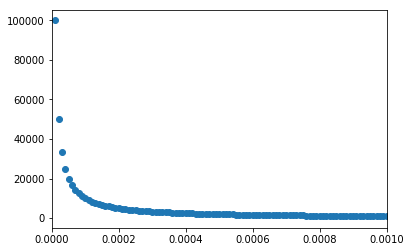

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.xlim(0, 1e-3)
plt.savefig("inv.pdf")